In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

Do the calculation:

In [13]:
stef_boltz = 5.67e-8 # Stefan-Boltzmann constant [W m^-2 K^-4]
F0 = 1362 # solar constant [W m^-2]
alph = np.exp(-1) # absorptivity []
# taking alpha to be exp(-1) is conservative as it 
# assumes that photons removed from direct beam are lost 

def d_fn(kap,gam,epsi,cos_th_av,f,chi):

    # kap: thermal conductivity [W m^-1 K^-1]
    # gam: visible extinction coefficient [m^-1]
    # epsi: thermal emissivity []
    # cos_th_av: mean solar zenith angle []
    # f: geometric factor (0.25 for sphere) []
    # chi: heat loss fraction from opaque part of habitat (0 for zero additional losses) []
    
    deltaT_max = lambda d: cos_th_av*f*F0*alph/(gam*kap*d**2)
    Teq = lambda d: (f*F0*alph/(epsi*stef_boltz*d**2))**0.25
    Tgoal = 273 + 15
    func = lambda d: (Teq(d) + deltaT_max(d))/(1+chi) - Tgoal
    d_best = root_scalar(func, bracket=[0.001, 100])
    d_val = d_best.root
    
    return d_val

n = 64
kap_a = np.logspace(-4,0,n) 
d1_a = np.zeros(n)
d2_a = np.zeros(n)
d3_a = np.zeros(n)
d4_a = np.zeros(n)

for ii in range(0,n):
    # spherically symmetric homogenous  
    d1_a[ii] = d_fn(kap_a[ii],30,0.95,0.5,0.25,0.0)
    # flat Sun-facing SSG layer with area = cross-sectional area
    # remainder is hemisphere with opaque insulating covering
    d2_a[ii] = d_fn(kap_a[ii],30,0.95,1.0,1.0,0.2)

Display the results:

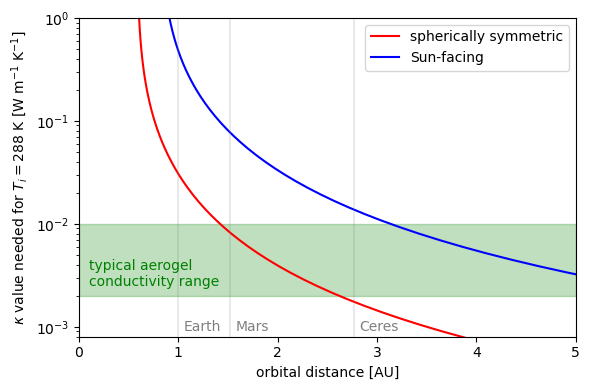

In [14]:
plt.figure(figsize=(6,4))

plt.semilogy(d1_a,kap_a,color='r',label='spherically symmetric')
plt.semilogy(d2_a,kap_a,color='b',label='Sun-facing')

plt.semilogy([1,1],[1e-4,1],color='gray',linewidth=0.25)
plt.semilogy([1.524, 1.524],[1e-4,1],color='gray',linewidth=0.25)
plt.semilogy([2.77, 2.77],[1e-4,1],color='gray',linewidth=0.25)
plt.axis([0,5,8e-4,1])
plt.text(1+0.05, 0.9e-3,'Earth',color='gray')
plt.text(1.524+0.05,0.9e-3,'Mars', color='gray')
plt.text(2.77+0.05,0.9e-3,'Ceres',color='gray')
plt.ylabel('$\kappa$ value needed for $T_i = 288$ K [W m$^{-1}$ K$^{-1}$]')
plt.xlabel('orbital distance [AU]')
plt.tight_layout()
plt.legend(loc='upper right')
plt.text(0.1, 2.5e-3,'typical aerogel\nconductivity range',color='green',horizontalalignment='left')

plt.fill([0, 5, 5, 0],[2e-3, 2e-3, 1e-2, 1e-2], color = 'green', alpha = 0.25)

# Save the results
plt.savefig('temperatures.pdf', format='pdf', dpi=300, bbox_inches='tight')